In [19]:
from pandas import read_csv, concat, DataFrame
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import savefig, show, subplots, figure, Axes
from ds_charts import get_variable_types, choose_grid, HEIGHT, multiple_line_chart, bar_chart
from numpy import nan

In [20]:

register_matplotlib_converters()
file = 'set1'
filename = 'data/set1_NYC_collisions_tabular.csv'
data = read_csv(filename, index_col='CRASH_DATE', parse_dates=True, infer_datetime_format=True)
data.describe(include='all')

,CRASH_TIME,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID,PERSON_INJURY
count,45669,45248.000000,45669,39434,45669,45669,6571,6546,39429,45669,45669,3.909800e+04,45669,6558,39448,45669,4.566900e+04,6571,4.566900e+04,45669
unique,24,NaN,14,16,3,4,4,39,4,19,8,NaN,45669,39,10,5,NaN,16,NaN,2
top,16:00,NaN,Back,Lap Belt & Harness,M,Occupant,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,Not Ejected,Complaint of Pain or Nausea,Conscious,NaN,06869fa4-85f9-4499-9491-11132224bdce,Unspecified,Driver,Driver,NaN,Crossing With Signal,NaN,Injured
freq,3006,NaN,7505,18184,27573,32903,3953,5772,35883,27958,42180,NaN,1,4675,26053,26542,NaN,2481,NaN,45416
mean,NaN,37.487646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.999663e+07,NaN,NaN,NaN,NaN,1.183588e+07,NaN,4.431737e+06,NaN
std,NaN,81.492032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940981e+04,NaN,NaN,NaN,NaN,1.375828e+05,NaN,2.753403e+04,NaN
min,NaN,-971.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982197e+07,NaN,NaN,NaN,NaN,1.153725e+07,NaN,4.380715e+06,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.996078e+07,NaN,NaN,NaN,NaN,1.177289e+07,NaN,4.408781e+06,NaN
50%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000877e+07,NaN,NaN,NaN,NaN,1.185680e+07,NaN,4.432358e+06,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005868e+07,NaN,NaN,NaN,NaN,1.194421e+07,NaN,4.455395e+06,NaN


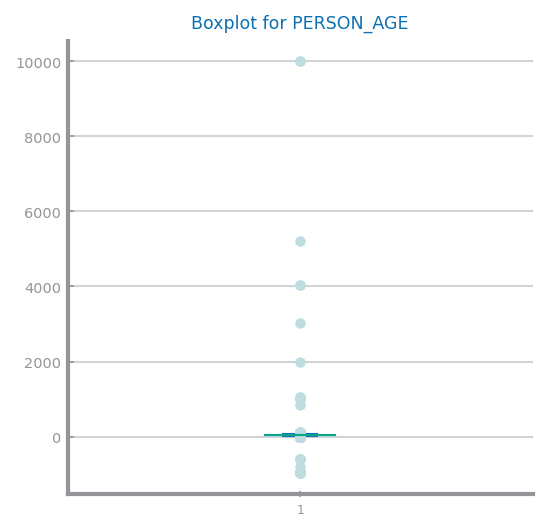

In [21]:
#Charts with details about single numeric
# numeric_vars = get_variable_types(data)['Numeric']
numeric_vars = ['PERSON_AGE']
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = choose_grid(len(numeric_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
savefig('images/set1_outlier_imputation_PERSON_AGE_new.png')
show()

In [22]:
# replace with NaN values > 130 or < 0 PERSON_AGE
data['PERSON_AGE'] = data['PERSON_AGE'].mask(data['PERSON_AGE'].lt(0),nan)
data['PERSON_AGE'] = data['PERSON_AGE'].mask(data['PERSON_AGE'].gt(130),nan)

In [23]:
data.describe(include='all')

,CRASH_TIME,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID,PERSON_INJURY
count,45669,45219.000000,45669,39434,45669,45669,6571,6546,39429,45669,45669,3.909800e+04,45669,6558,39448,45669,4.566900e+04,6571,4.566900e+04,45669
unique,24,NaN,14,16,3,4,4,39,4,19,8,NaN,45669,39,10,5,NaN,16,NaN,2
top,16:00,NaN,Back,Lap Belt & Harness,M,Occupant,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Unspecified,Not Ejected,Complaint of Pain or Nausea,Conscious,NaN,06869fa4-85f9-4499-9491-11132224bdce,Unspecified,Driver,Driver,NaN,Crossing With Signal,NaN,Injured
freq,3006,NaN,7505,18184,27573,32903,3953,5772,35883,27958,42180,NaN,1,4675,26053,26542,NaN,2481,NaN,45416
mean,NaN,36.785334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.999663e+07,NaN,NaN,NaN,NaN,1.183588e+07,NaN,4.431737e+06,NaN
std,NaN,16.588986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.940981e+04,NaN,NaN,NaN,NaN,1.375828e+05,NaN,2.753403e+04,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982197e+07,NaN,NaN,NaN,NaN,1.153725e+07,NaN,4.380715e+06,NaN
25%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.996078e+07,NaN,NaN,NaN,NaN,1.177289e+07,NaN,4.408781e+06,NaN
50%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000877e+07,NaN,NaN,NaN,NaN,1.185680e+07,NaN,4.432358e+06,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.005868e+07,NaN,NaN,NaN,NaN,1.194421e+07,NaN,4.455395e+06,NaN


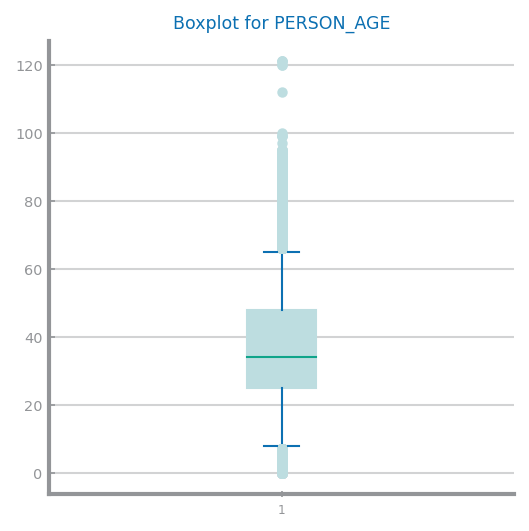

In [24]:
#Charts with details about single numeric
# numeric_vars = get_variable_types(data)['Numeric']
numeric_vars = ['PERSON_AGE']
if [] == numeric_vars:
    raise ValueError('There are no numeric variables.')
rows, cols = choose_grid(len(numeric_vars))
fig, axs = subplots(rows, cols, figsize=(cols*HEIGHT, rows*HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
savefig('images/set1_outlier_imputation_PERSON_AGE_old.png')
show()

In [26]:
data.to_csv(f'new_data/{file}_outliers.csv', index=True)